## Company X's StartUp Battlefield event project

# 1. Datawarehouse

#### Importing required python libraries

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading data from csv
startupData = pd.read_csv('CompanyX_EU.csv')
startupData.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


# 2. Data Exploration

In [3]:
#Shape of dataset
startupData.shape

(662, 6)

In [4]:
## Datatype of each attribute
startupData.dtypes

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object

In [5]:
startupData.dtypes.to_frame(name = 'Data Type')

,Data Type
Startup,object
Product,object
Funding,object
Event,object
Result,object
OperatingState,object


In [6]:
# Info about dataset 
startupData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


In [7]:
#null check
startupData.isnull().any()

Startup           False
Product            True
Funding            True
Event             False
Result            False
OperatingState    False
dtype: bool

In [8]:
#null check
startupData.isnull().values.any()

True

In [9]:
# Number of missing/null values in dataframe
startupData.isna().sum().sum()

220

In [10]:
startupData.describe()

,Startup,Product,Funding,Event,Result,OperatingState
count,662,656,448,662,662,662
unique,662,656,240,26,5,4
top,SeqCentral,keenhome.io,$1M,TC50 2008,Contestant,Operating
freq,1,1,17,52,488,465


In [11]:
startupData.describe().transpose()

,count,unique,top,freq
Startup,662,662,SeqCentral,1
Product,656,656,keenhome.io,1
Funding,448,240,$1M,17
Event,662,26,TC50 2008,52
Result,662,5,Contestant,488
OperatingState,662,4,Operating,465


# 3. Data preprocessing & visualisation

In [12]:
# Dropping null values (with inplace False)
cleanedStartupData = startupData.dropna(axis='index', how='any', thresh=None, subset=None, inplace=False)
cleanedStartupData

,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


In [13]:
#null check
cleanedStartupData.isnull().any()

## Dataset is cleaned. No null values

Startup           False
Product           False
Funding           False
Event             False
Result            False
OperatingState    False
dtype: bool

In [14]:
#null check
cleanedStartupData.isnull().values.any()

False

In [15]:
cleanedStartupData.isna().sum().sum()

# null values count is 0.Data cleaned

0

In [16]:
# Removing $ symbol
cleanedStartupData['Funding'] = cleanedStartupData['Funding'].str.replace('$', '')
cleanedStartupData['Funding']

1       630K
3         1M
5      19.3M
6        29M
10      1.8M
       ...  
657       8M
658       1M
659     223M
660     3.4M
661    31.5M
Name: Funding, Length: 446, dtype: object

In [17]:
# Converting values to Millions
for index, row in cleanedStartupData.iterrows():
        if 'M' not in row.Funding:
            value = float(cleanedStartupData.at[index,'Funding'][:-1]) * 0.001
        if 'M' in row.Funding:
            value = float(cleanedStartupData.at[index,'Funding'][:-1])
        cleanedStartupData.at[index,'Funding'] = value
cleanedStartupData['Funding']

1      0.63
3         1
5      19.3
6        29
10      1.8
       ... 
657       8
658       1
659     223
660     3.4
661    31.5
Name: Funding, Length: 446, dtype: object

In [18]:
# Converting datatype to float 
cleanedStartupData['Funding'] = cleanedStartupData['Funding'].astype('float')
cleanedStartupData['Funding'] = round(cleanedStartupData['Funding'], 2)

In [19]:
# Cleaned Funding column
cleanedStartupData['Funding']

1        0.63
3        1.00
5       19.30
6       29.00
10       1.80
        ...  
657      8.00
658      1.00
659    223.00
660      3.40
661     31.50
Name: Funding, Length: 446, dtype: float64

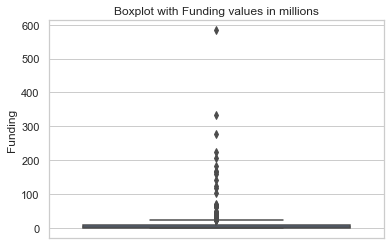

In [20]:
#Box Plot for funds in million
sns.set_theme(style="whitegrid")
sns.boxplot(y=cleanedStartupData['Funding']).set_title('Boxplot with Funding values in millions');
plt.show()

In [21]:
cleanedStartupData['Funding'].describe()

count    446.000000
mean      13.429865
std       42.545154
min        0.000000
25%        0.725000
50%        2.200000
75%        9.350000
max      583.600000
Name: Funding, dtype: float64

In [22]:
#From the above data
q1 = 0.725000
q2 = 2.200000
q3 = 9.350000
#IQR = Q3 - Q1
iqr = q3-q1
print('IQR = ', iqr)

IQR =  8.625


In [23]:
# Finding upper and lower fence
upperFence = q3 + (1.5 * iqr)
lowerFence = q1 - (1.5 * iqr)
print('Upper Fence :', upperFence)
print('Lower Fence :', lowerFence)

Upper Fence : 22.2875
Lower Fence : -12.2125


In [24]:
# Number of outliers greater than upper fence
cleanedStartupData.Funding[cleanedStartupData.Funding > upperFence].count() 

59

In [25]:
# Dropping the values that are greater than upper fence.
filteredStartupData = cleanedStartupData.drop(cleanedStartupData[cleanedStartupData['Funding'] > upperFence].index, inplace = False)
filteredStartupData

,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,0.63,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,1.00,Disrupt NY 2016,Audience choice,Operating
5,5to1,5to1.com,19.30,TC50 2009,Contestant,Acquired
10,AdhereTech,adheretech.com,1.80,Hardware Battlefield 2014,Contestant,Operating
11,AdRocket,adrocket.com,1.00,TC50 2008,Contestant,Closed
...,...,...,...,...,...,...
645,Yap,yapme.com,10.00,TC40 2007,Contestant,Closed
646,YayPay Inc,yaypay.com,0.90,Disrupt London 2015,Contestant,Operating
657,Zivity,zivity.com,8.00,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,1.00,-,Audience choice,Operating


In [26]:
# Filered Startup data 
filteredStartupData.shape #446-59 outliers = 387

(387, 6)

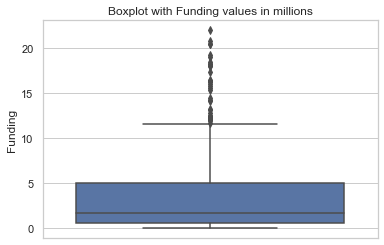

In [27]:
#Plotting Box plot after filteringthe outliers
sns.set_theme(style="whitegrid")
sns.boxplot(y=filteredStartupData['Funding']).set_title('Boxplot with Funding values in millions');
plt.show()

In [28]:
# Frequency of operating state
frequencyOfOperatingState = filteredStartupData.groupby('OperatingState').count()

print(frequencyOfOperatingState)

                Startup  Product  Funding  Event  Result
OperatingState                                          
Acquired             55       55       55     55      55
Closed               56       56       56     56      56
Operating           276      276      276    276     276


In [30]:
# Frequency distribution of OperatingState variable by PERCENTAGE
filteredStartupData['OperatingState'].value_counts(normalize=True) * 100

Operating    71.317829
Closed       14.470284
Acquired     14.211886
Name: OperatingState, dtype: float64

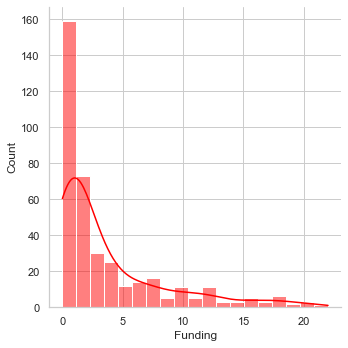

In [31]:
# Plotting distribution plot for Funding column in million
sns.set_style('whitegrid')
sns.displot(filteredStartupData['Funding'], kde = True, color ='red')

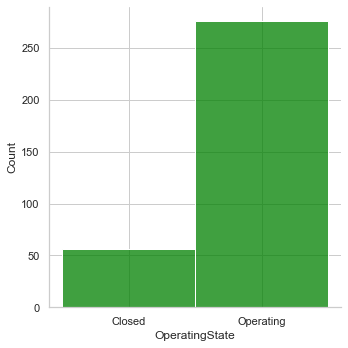

In [32]:
# Plotting distribution plots for companies still operating and companies that closed
operatingAndClosed = pd.Series(filteredStartupData['OperatingState'])
operatingAndClosed = operatingAndClosed[operatingAndClosed != 'Acquired']
sns.set_style('whitegrid')
sns.displot(operatingAndClosed, kde = False, color ='green')

# 4. Statistical Analysis

In [33]:
#Copy of original dataframe
copiedDF = filteredStartupData

In [34]:
# Frequency distribution of result variable
frequencyOfResult = copiedDF.groupby('Result').count()

print(frequencyOfResult)

                 Startup  Product  Funding  Event  OperatingState
Result                                                           
Audience choice       20       20       20     20              20
Contestant           283      283      283    283             283
Finalist              52       52       52     52              52
Runner up             15       15       15     15              15
Winner                17       17       17     17              17


In [35]:
# Frequency distribution of result variable by PERCENTAGE
copiedDF['Result'].value_counts(normalize=True) * 100

Contestant         73.126615
Finalist           13.436693
Audience choice     5.167959
Winner              4.392765
Runner up           3.875969
Name: Result, dtype: float64

In [36]:
# Calculating percentage of winners that are still operating and percentage of contestants that are still operating
operatingDF = copiedDF.loc[copiedDF['OperatingState'] == 'Operating']
resultPercentage = operatingDF['Result'].value_counts(normalize=True) * 100
print('Percentages of Result column based on OperatingState = Operating')
print(resultPercentage)

Percentages of Result column based on OperatingState = Operating
Contestant         70.652174
Finalist           13.405797
Audience choice     6.521739
Runner up           5.072464
Winner              4.347826
Name: Result, dtype: float64


In [37]:
print('percentage of winners that are still operating is ',resultPercentage.Winner )
print('percentage of contestants that are still operating is ',resultPercentage.Contestant )

percentage of winners that are still operating is  4.3478260869565215
percentage of contestants that are still operating is  70.65217391304348


In [38]:
# Frequency distribution of event variable
frequencyOfEvent = copiedDF.groupby('Event').count()

print(frequencyOfEvent)

                           Startup  Product  Funding  Result  OperatingState
Event                                                                       
-                                6        6        6       6               6
Disrupt Beijing 2011             4        4        4       4               4
Disrupt EU 2013                  9        9        9       9               9
Disrupt EU 2014                 10       10       10      10              10
Disrupt London 2015             11       11       11      11              11
Disrupt London 2016             10       10       10      10              10
Disrupt NY 2015                 21       21       21      21              21
Disrupt NY 2016                 16       16       16      16              16
Disrupt NYC 2010                10       10       10      10              10
Disrupt NYC 2011                15       15       15      15              15
Disrupt NYC 2012                19       19       19      19              19

In [39]:
# Frequency distribution of event variable by PERCENTAGE
copiedDF['Event'].value_counts(normalize=True) * 100

TC50 2008                    6.718346
TC40 2007                    5.684755
Disrupt NY 2015              5.426357
Disrupt NYC 2012             4.909561
Disrupt SF 2013              4.909561
Disrupt SF 2015              4.909561
TC50 2009                    4.909561
Disrupt NYC 2013             4.909561
Disrupt SF 2011              4.909561
Disrupt SF 2014              4.909561
Disrupt SF 2016              4.392765
Disrupt NY 2016              4.134367
Disrupt NYC 2011             3.875969
Disrupt NYC 2014             3.875969
Disrupt SF 2012              3.875969
Disrupt SF 2010              3.359173
Hardware Battlefield 2016    3.100775
Hardware Battlefield 2014    3.100775
Disrupt London 2015          2.842377
Disrupt NYC 2010             2.583979
Disrupt London 2016          2.583979
Hardware Battlefield 2015    2.583979
Disrupt EU 2014              2.583979
Disrupt EU 2013              2.325581
-                            1.550388
Disrupt Beijing 2011         1.033592
Name: Event,

In [42]:
#Selecting only the Event that has disrupt keyword from 2013 onwards.
distruptDF = copiedDF[copiedDF['Event'].str.contains('Disrupt')]
distruptDF = distruptDF[distruptDF['Event']>=str(2013)]
distruptDF

,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,0.63,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,1.00,Disrupt NY 2016,Audience choice,Operating
13,Agrilyst,agrilyst.com,1.00,Disrupt SF 2015,Winner,Operating
14,Aiden,aiden.ai,0.75,Disrupt London 2016,Contestant,Operating
16,Aircall,aircall.io,11.60,Disrupt SF 2015,Contestant,Operating
...,...,...,...,...,...,...
635,Welltwigs,welltwigs.com,0.05,Disrupt NY 2015,Contestant,Operating
641,Workspot,workspot.com,15.80,Disrupt NYC 2013,Contestant,Operating
642,Xendo,xendo.com,0.03,Disrupt SF 2014,Contestant,Acquired
646,YayPay Inc,yaypay.com,0.90,Disrupt London 2015,Contestant,Operating


In [43]:
# Frequency distribution of EVENTS variable that has disrupt keyword from 2013 onwards.
distruptDF['Event'].value_counts(normalize=True) * 100

Disrupt NY 2015         7.500000
Disrupt NYC 2012        6.785714
Disrupt SF 2013         6.785714
Disrupt SF 2014         6.785714
Disrupt SF 2011         6.785714
Disrupt NYC 2013        6.785714
Disrupt SF 2015         6.785714
Disrupt SF 2016         6.071429
Disrupt NY 2016         5.714286
Disrupt NYC 2011        5.357143
Disrupt NYC 2014        5.357143
Disrupt SF 2012         5.357143
Disrupt SF 2010         4.642857
Disrupt London 2015     3.928571
Disrupt London 2016     3.571429
Disrupt NYC 2010        3.571429
Disrupt EU 2014         3.571429
Disrupt EU 2013         3.214286
Disrupt Beijing 2011    1.428571
Name: Event, dtype: float64

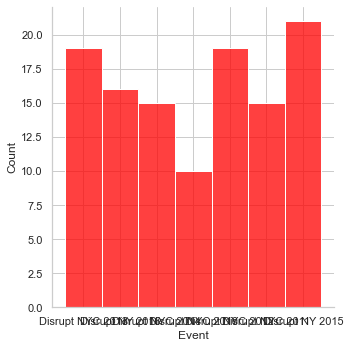

In [44]:
# Plotting distribution plots comparing 3 city events
nyDF = distruptDF[distruptDF['Event'].str.contains("NY")]
sns.displot(x=nyDF['Event'], color='red')

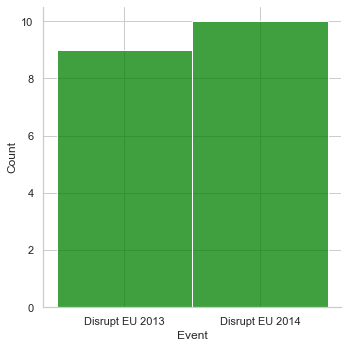

In [45]:
euDF = distruptDF[distruptDF['Event'].str.contains("EU")]
sns.displot(x=euDF['Event'], color='green')

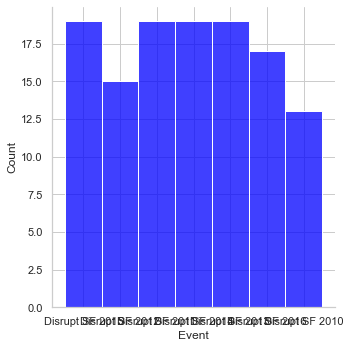

In [46]:
sfDF = distruptDF[distruptDF['Event'].str.contains("SF")]
sns.displot(x=sfDF['Event'], color='blue')

# 5. Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to perform a better data analysis.

#### Data set was ample to perform the operation, funds data had to be cleaned up and ouliers were managed.